In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline 
mpl.rcParams['legend.fontsize'] = 10

In [3]:
xmin , xmax , ymin , ymax = -1 , 1 , -1 , 1
extent = [xmin , xmax , ymin , ymax ]

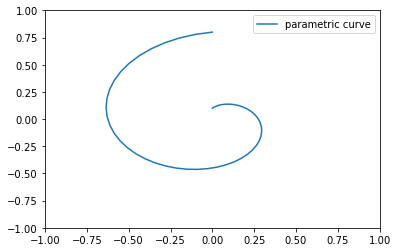

In [4]:
fig = plt.figure()

theta=np.linspace(0.0, 2*np.pi, num=50)
r=np.linspace(0.1, 0.8, num=50)

x=r*np.sin(theta)
y=r*np.cos(theta)

plt.plot(x, y, label = 'parametric curve')
plt.axis((xmin , xmax , ymin , ymax))
plt.legend()

plt.show()

In [5]:
from keras.layers import Input, Dense
from keras.models import Model

input_dim = 2
layes_size = [100 , 1]  

input_img = Input(shape=(input_dim,))
encoded1 = Dense(layes_size[0], activation='sigmoid')(input_img)
encoded2 = Dense(layes_size[1], activation='sigmoid')(encoded1)
decoded1 = Dense(layes_size[1], activation='sigmoid')(encoded2)
decoded2 = Dense(layes_size[0], activation='sigmoid')(decoded1)
decoded3 = Dense(input_dim, activation='linear')(decoded2)

autoencoder = Model(input_img, decoded3)

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 60.0% of memory, cuDNN 5110)


In [6]:
from keras_tqdm import TQDMNotebookCallback, TQDMCallback
import keras
from keras import optimizers

In [7]:
rmsprop = optimizers.rmsprop(lr= 0.01)
autoencoder.compile(optimizer=rmsprop, loss=keras.losses.mean_squared_error)#

In [8]:
x_train = np.transpose(np.array([x,y]))
hist = autoencoder.fit(x_train, x_train,
                epochs=4000,
                shuffle=True,
                verbose=0)#,

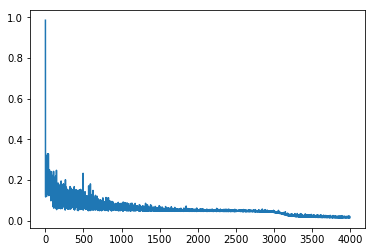

In [9]:
plt.plot(hist.history['loss'])
plt.show()

In [10]:
ngrid=100

xx=np.linspace(-1,1,ngrid)
yy=np.linspace(-1,1,ngrid)
xv, yv = np.meshgrid(xx, yy)

ss=np.zeros(shape=(ngrid,ngrid))

for i in range(ngrid):
    for j in range(ngrid):
        inputs=np.array([xv[i,j],yv[i,j]]).reshape(1,-1)
        e = autoencoder.predict(inputs) - inputs
        ss[i,j] = np.linalg.norm(e,ord=2)

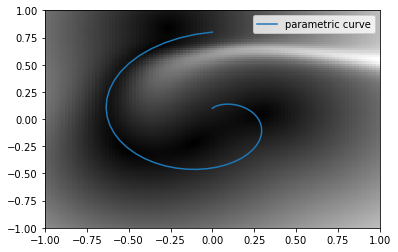

In [11]:
fig = plt.figure()
plotkwargs = {'cmap' : cm.gray}
plt.pcolor(xv, yv, ss, **plotkwargs)
plt.plot(x, y, label='parametric curve')
plt.legend()
plt.show()